# Part II - FIFA19
## by: Rawabi Alharbi

## Investigation Overview

I am interested in investigating the attributes which each playing positions need to have and what attributes influence whether a player is a top footballer.

## Dataset Overview

The dataset includes detailed attributes for every player registered in the latest edition of FIFA 19 database.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fifa_df = pd.read_csv('clean_master_fifa19.csv')

In [3]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16643 entries, 0 to 16642
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16643 non-null  int64  
 1   id                        16643 non-null  int64  
 2   name                      16643 non-null  object 
 3   age                       16643 non-null  int64  
 4   nationality               16643 non-null  object 
 5   overall                   16643 non-null  int64  
 6   potential                 16643 non-null  int64  
 7   club                      16643 non-null  object 
 8   value                     16643 non-null  int64  
 9   wage                      16643 non-null  int64  
 10  special                   16643 non-null  int64  
 11  preferred_foot            16643 non-null  object 
 12  international_reputation  16643 non-null  int64  
 13  weak_foot                 16643 non-null  int64  
 14  skill_

## Distribution of Players' Weights

The weight distribution of the players is normal. Most players weighing between 70kg and 80kg.

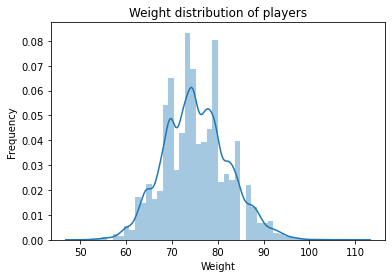

In [7]:
#histogram
sb.distplot(fifa_df['weight'])
# Add labels
plt.title('Weight distribution of players')
plt.xlabel('Weight')
plt.ylabel('Frequency');

## Distribution of Players' Ages

Most of the players in FIFA19 dataset are in their 20s. And it's their age distribution is slightly positive skewed.

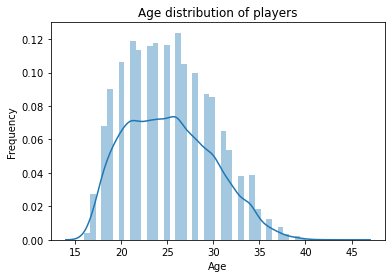

In [8]:
sb.distplot(fifa_df['age']) 

# Add labels
plt.title('Age distribution of players')
plt.xlabel('Age')
plt.ylabel('Frequency');

## Distribution of Players' Body Types

In FIFA19, most players are haveing a normal body type while very few players are haveing a stocky body type.

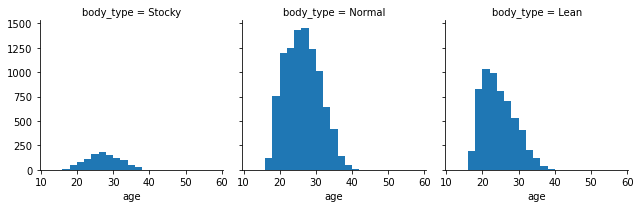

In [17]:
# plotting Facet
bins = np.arange(12, 59, 2)
g = sb.FacetGrid(data = fifa_df, col = 'body_type')
g.map(plt.hist, 'age', bins = bins);

## Relationship between Age, Weight, Acceleration

Logically, the younger the player and the less wieght they have, the more accelerate they are.

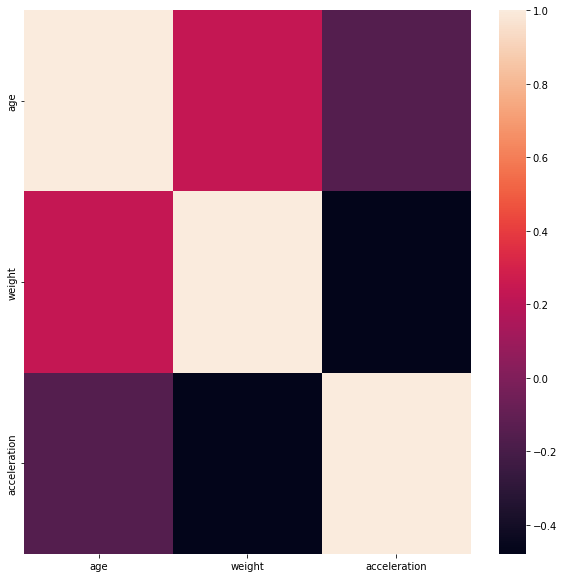

In [15]:
fifa_hist = fifa_df[['age', 'weight','acceleration']]

# plotting heatmap
f, ax = plt.subplots(figsize=(10, 10))
corr = fifa_hist.corr()
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values);

## How Weight, Age and Body Type Are Influencing Each Other

In FIFA19, most of the younger players weighs lesser and they also have more of a lean body type.

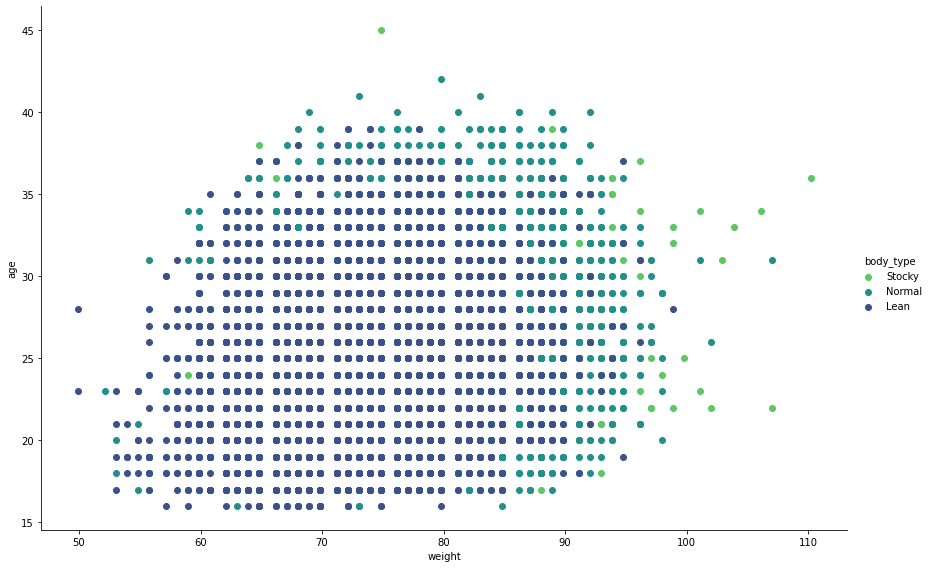

In [19]:
# plotting facet
g = sb.FacetGrid(data = fifa_df, hue = 'body_type', size = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'weight', 'age')
g.add_legend();

## How Age, Work Rate and Acceleration Are Influencing Each Other

As the player ages, so does their acceleration, their work rate is affected negativally.

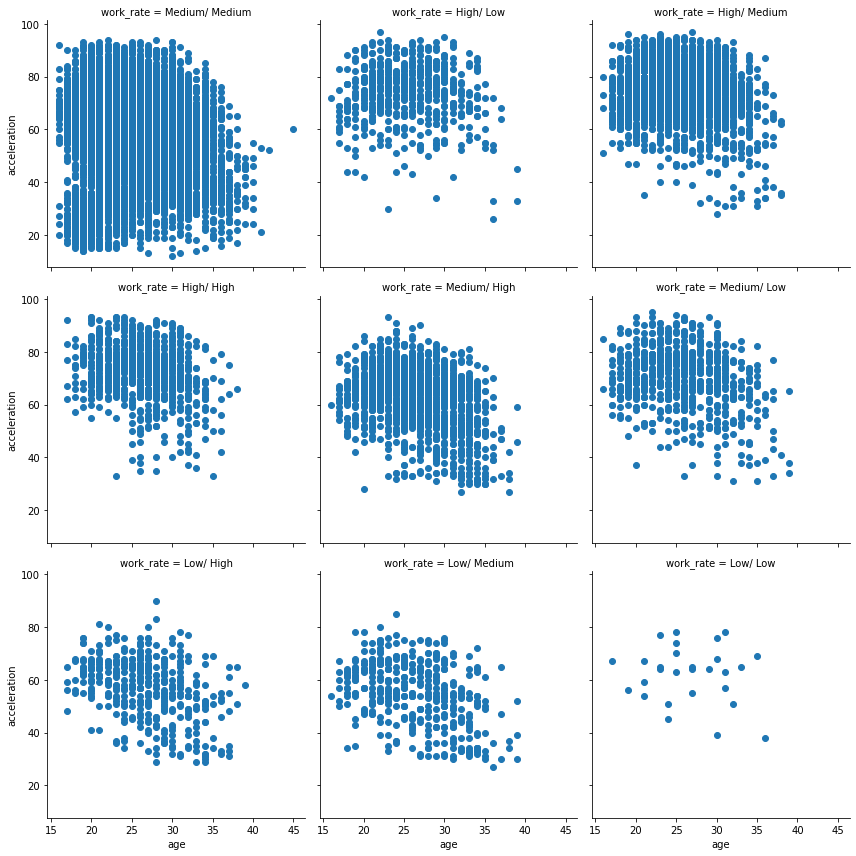

In [21]:
# plotting facet
g = sb.FacetGrid(data = fifa_df, col = 'work_rate', col_wrap = 3, size = 4)
g.map(plt.scatter, 'age', 'acceleration');